In this project I am looking at data from a dating site to see if we can predict astrology signs.

In [12]:
## General libraries
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 6]
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Upload files and observe the first 5 rows.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving profiles.csv to profiles.csv


In [3]:
profiles = pd.read_csv('profiles.csv')
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


Seeing all the column names.

In [4]:
column_names_list = profiles.columns.tolist()
print(f"Column names (list): {column_names_list}")

Column names (list): ['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job', 'last_online', 'location', 'offspring', 'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes', 'speaks', 'status']


In [5]:
profiles.last_online.head()

,last_online
0,2012-06-28-20-30
1,2012-06-29-21-41
2,2012-06-27-09-10
3,2012-06-28-14-22
4,2012-06-27-21-26


Seeing how many rows this data has.

In [6]:
print(profiles.shape)

(59946, 31)


A lot of unique astrology answers.

In [8]:
print(profiles.sign.nunique())
print(profiles.sign.unique())

48
['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' nan
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t matter' 'aries'
 'scorpio but it doesn&rsquo;t matter'
 's

Clean up the astrology column by making a new column with only the astrology sign. Leaving the original column intact in case we need it later.

In [10]:
profiles['signs_cleaned'] = profiles.sign.str.split().str.get(0)
print(profiles.signs_cleaned.nunique())
print(profiles.signs_cleaned.unique())

profiles.signs_cleaned.value_counts()

12
['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']


,count
signs_cleaned,
leo,4374
gemini,4310
libra,4207
cancer,4206
virgo,4141
taurus,4140
scorpio,4134
aries,3989
pisces,3946


Visualizing a lot of data. Conclussions will be found at the end.

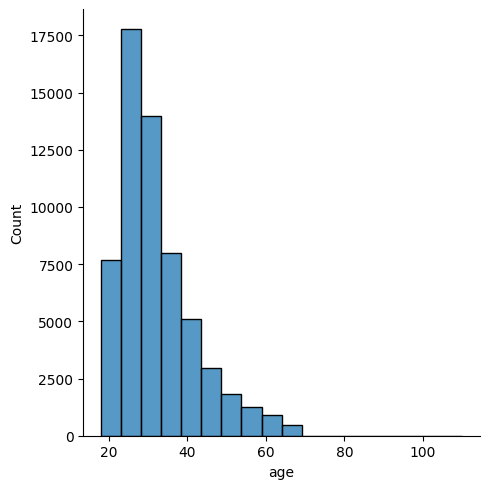

In [13]:
sns.displot(data=profiles, x="age", kind="hist", binwidth = 5);

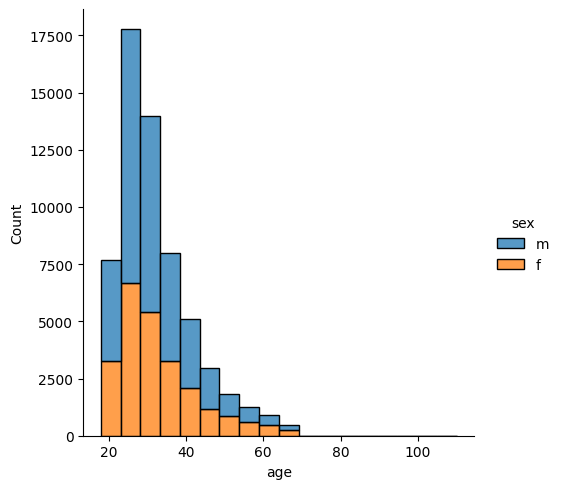

In [14]:
sns.displot(data=profiles, x="age", hue="sex", kind="hist", binwidth = 5, multiple = "stack");

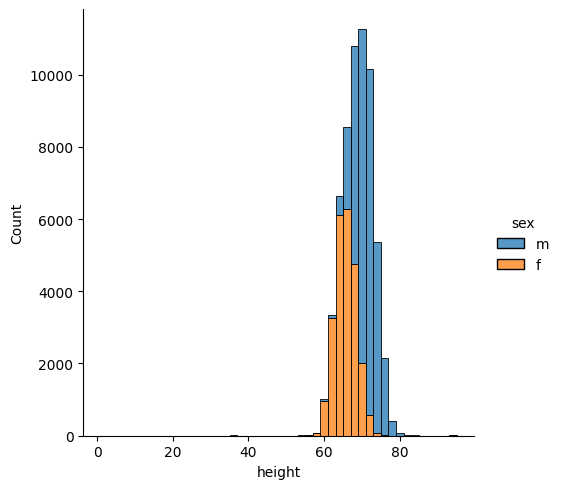

In [15]:
sns.displot(data=profiles, x="height",hue="sex", kind="hist", binwidth = 2, multiple = "stack");

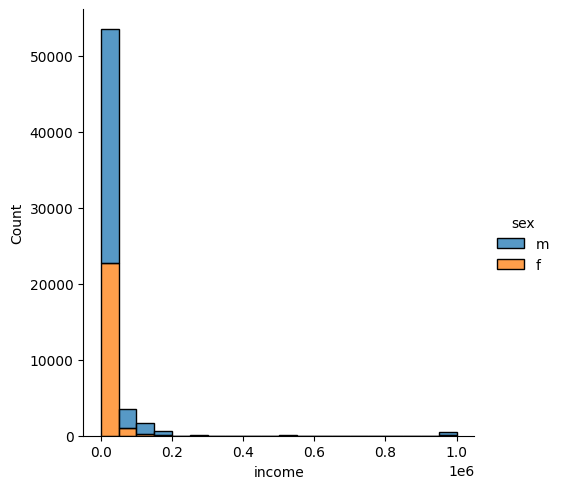

In [16]:
sns.displot(data=profiles, x="income",hue="sex", kind="hist", binwidth = 50000, multiple = "stack");

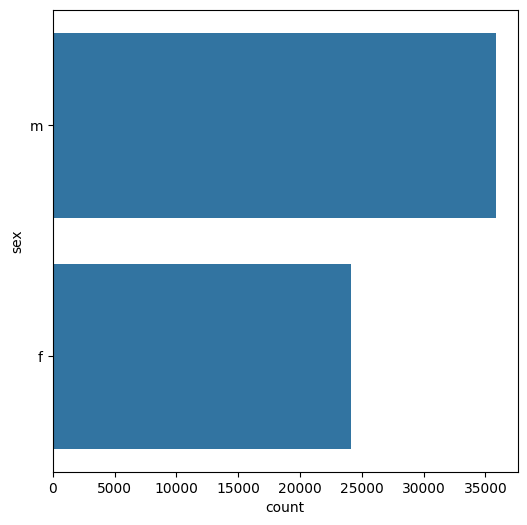

In [17]:
sns.countplot(data=profiles, y="sex");

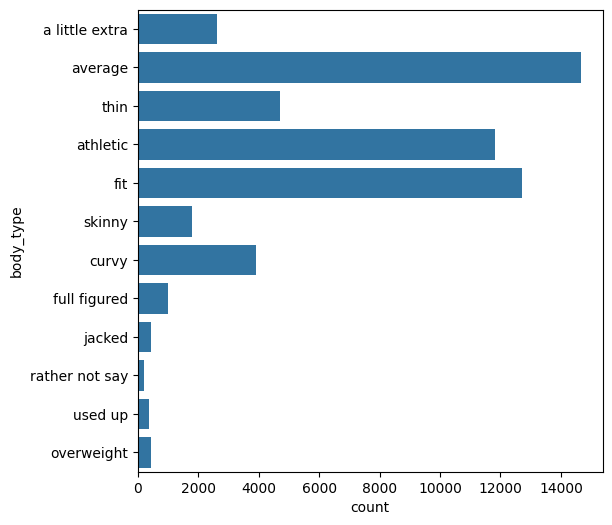

In [18]:
sns.countplot(data=profiles, y="body_type");

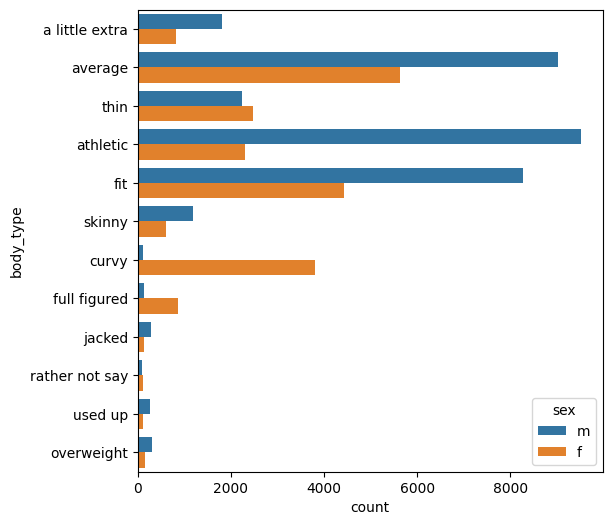

In [19]:
sns.countplot(data=profiles, y="body_type", hue = "sex");

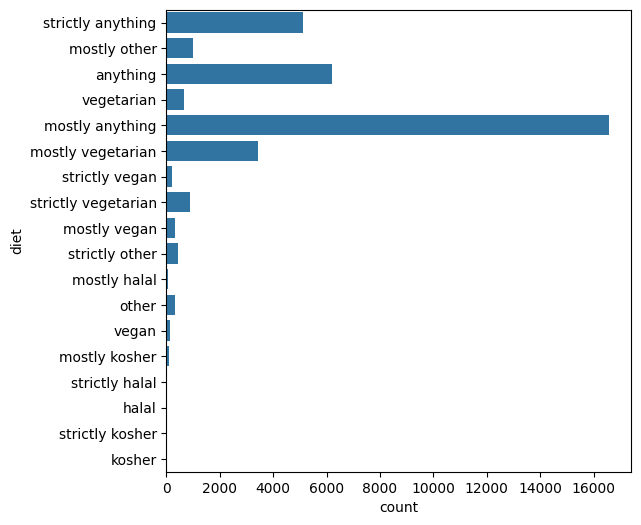

In [20]:
sns.countplot(data=profiles, y="diet");

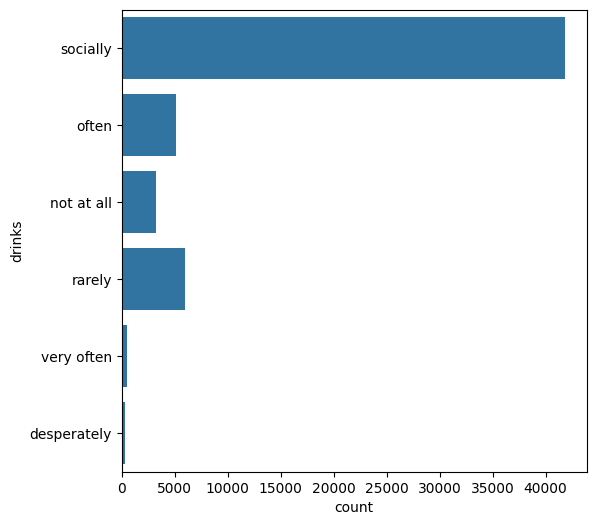

In [21]:
sns.countplot(data=profiles, y="drinks");

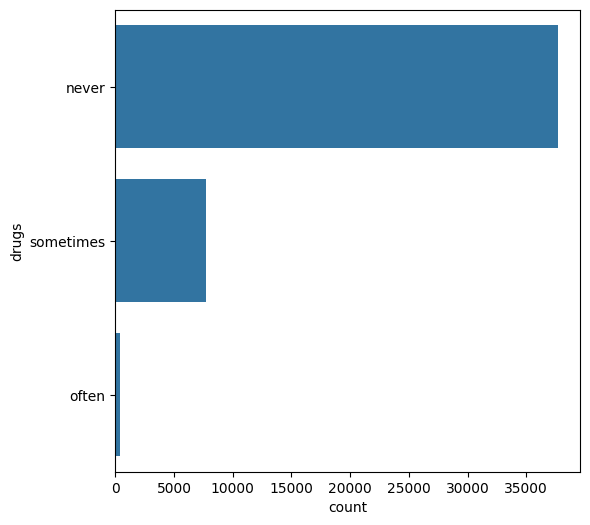

In [22]:
sns.countplot(data=profiles, y="drugs");

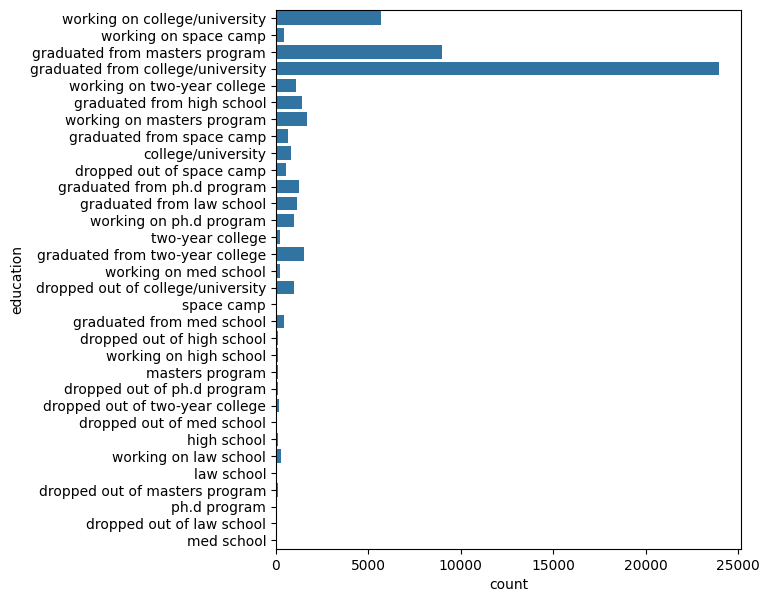

In [23]:
plt.figure(figsize=(6,7))

sns.countplot(data=profiles, y="education");

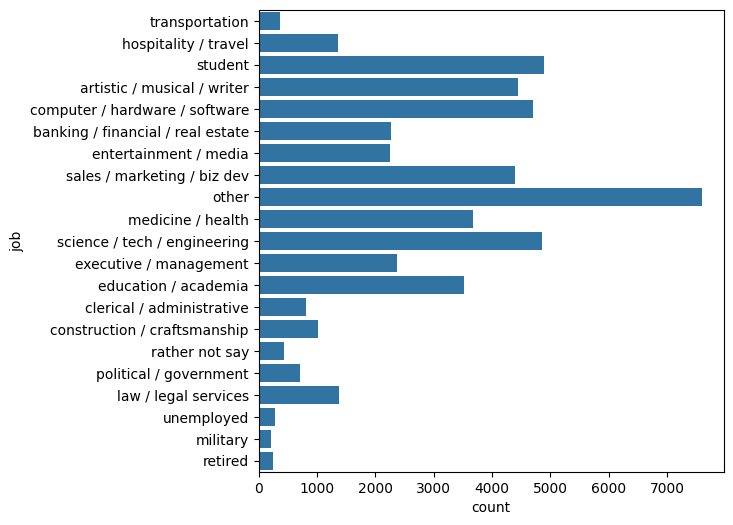

In [24]:
sns.countplot(data=profiles, y="job");

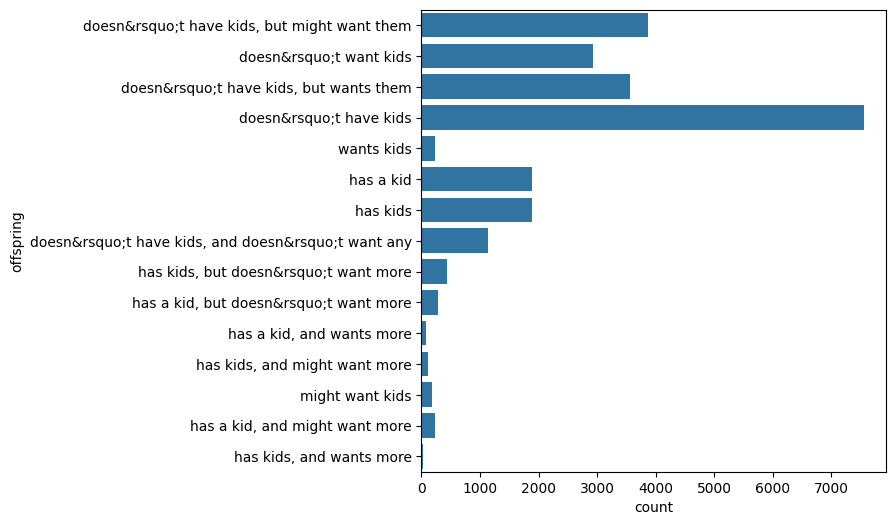

In [25]:
sns.countplot(data=profiles, y="offspring");

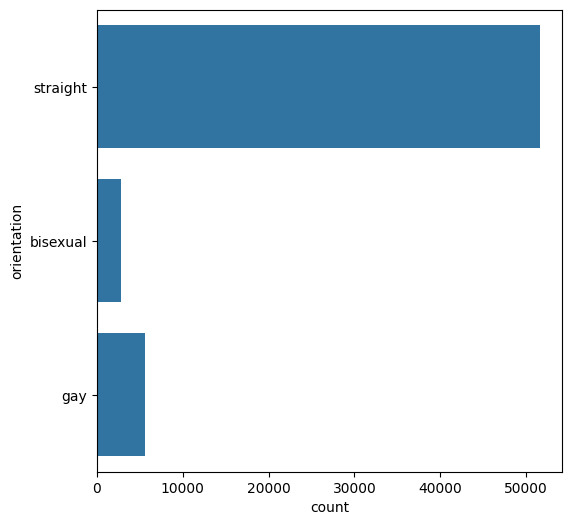

In [26]:
sns.countplot(data=profiles, y="orientation");

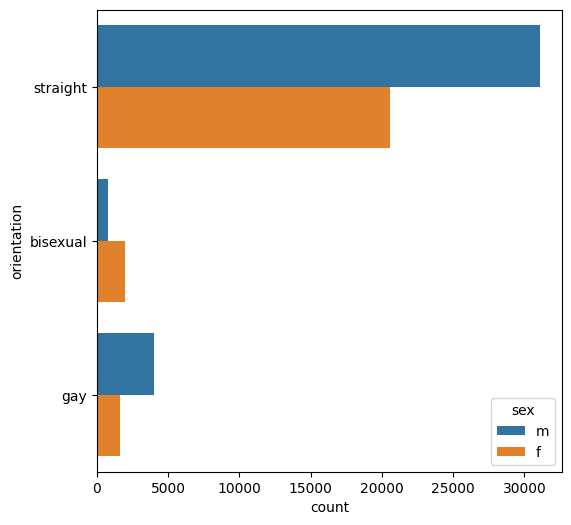

In [27]:
sns.countplot(data=profiles, y="orientation", hue = "sex");

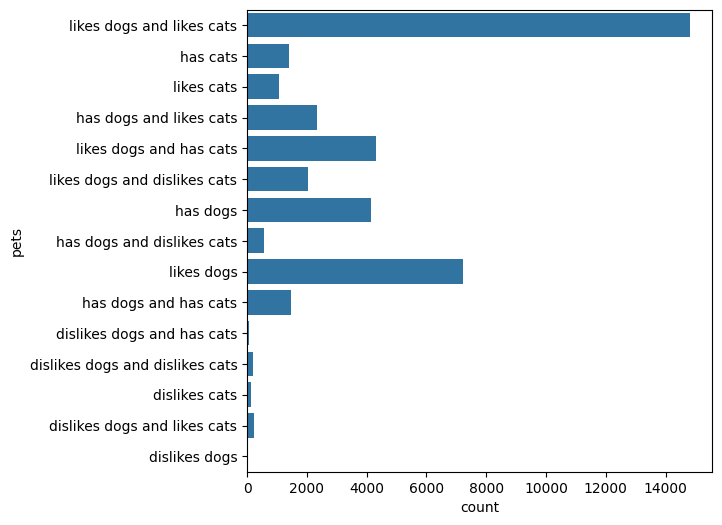

In [28]:
sns.countplot(data=profiles, y="pets");

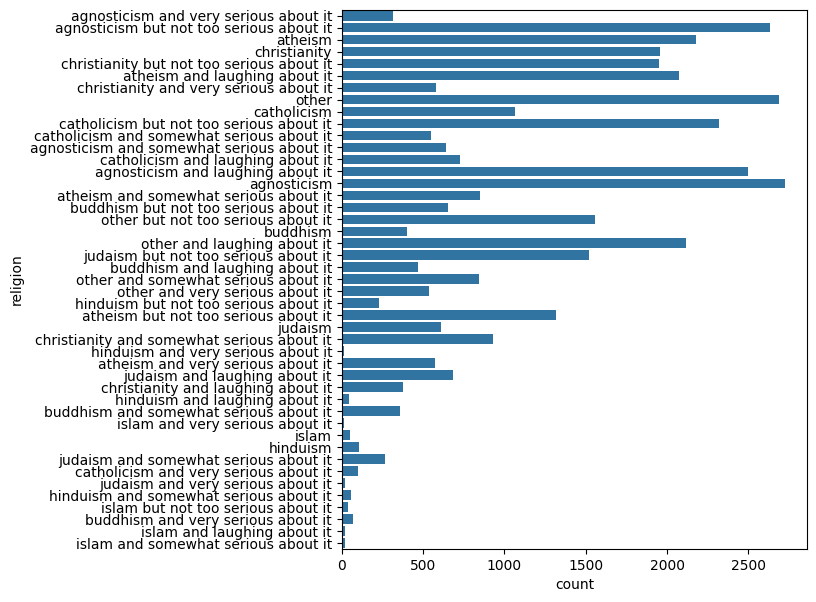

In [29]:
plt.figure(figsize=(6,7))
sns.countplot(data=profiles, y="religion");

Cleaned up religion.

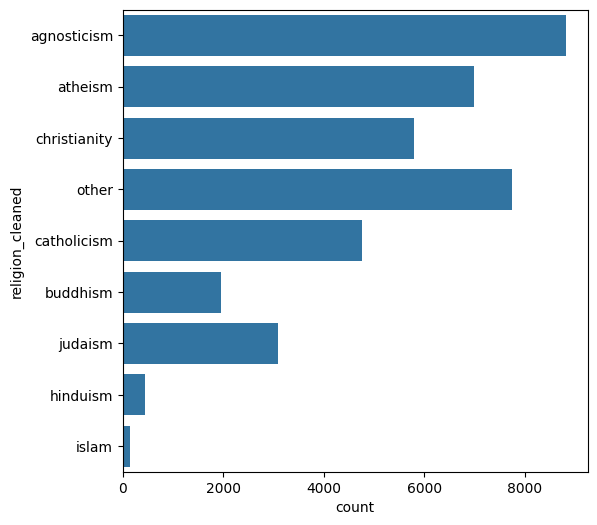

In [30]:
profiles['religion_cleaned'] = profiles.religion.str.split().str.get(0)
sns.countplot(data=profiles, y="religion_cleaned");

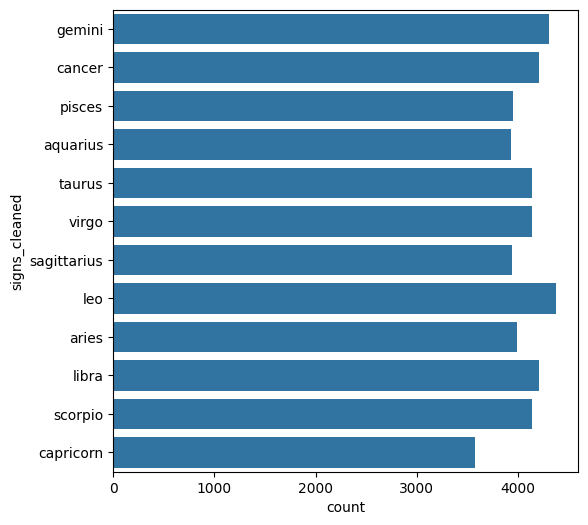

In [32]:
sns.countplot(data=profiles, y="signs_cleaned");

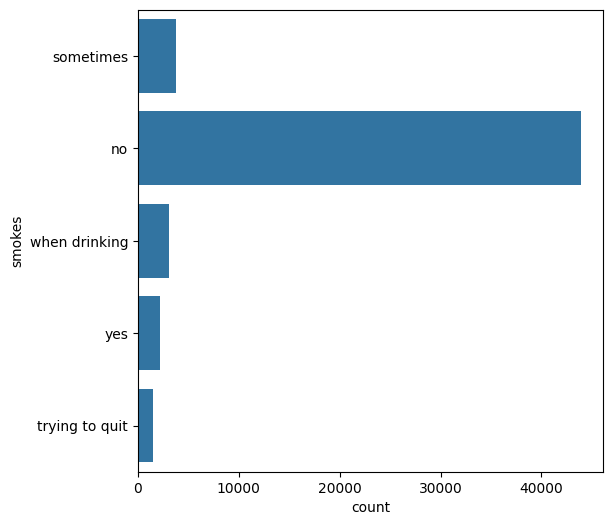

In [33]:
sns.countplot(data=profiles, y="smokes");

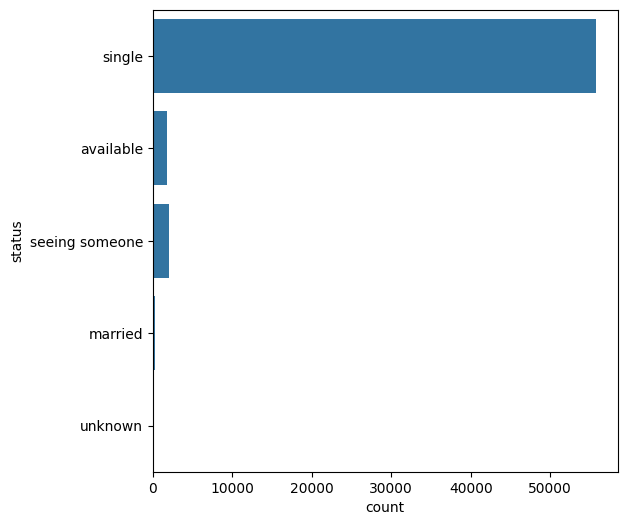

In [34]:
sns.countplot(data=profiles, y="status");

Conclusions:
Age: Mostly in their 20s and 30s.
Height: Women mostly above 60 inches. Men mostly above 68 inches.
Sex: Predominatley male with a 7:5 ratio fo men to women.
Body Type: Men described themselves as average, athletic and fit. Women described themselves as average, fit, and curvy.
Diet: Anything for both sexes.
Drinks: Mostly social.
Drugs: Mostly never.
Education: Mostly college graduates with high amount of graduate school.
Jobs: A good distribution amongst all fields.
Offspring: Most don't have kids.
Orientation: Predomintaly straight
Religion: Mostly non-religious and Christians.
Astrology: Well distributed with no clear trend.
Smoker: Mostly no.
Relationship status: Single mostly.




In [35]:
profiles.isnull().sum()

,0
age,0
body_type,5296
diet,24395
drinks,2985
drugs,14080
education,6628
essay0,5488
essay1,7572
essay2,9638
essay3,11476


Removing all empty values.

In [37]:
cols = ['body_type', 'diet', 'orientation', 'pets', 'religion_cleaned',
       'sex', 'job', 'signs_cleaned']
df = profiles[cols].dropna()
df.shape

(16453, 8)

Turn the columns into binary identifiers.

In [40]:
for col in cols[:-1]:
    df = pd.get_dummies(df, columns=[col], prefix = [col])


KeyError: "None of [Index(['body_type'], dtype='object')] are in the [columns]"

In [41]:
df.head()

,signs_cleaned,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,job_military,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed
0,gemini,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,cancer,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,taurus,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,sagittarius,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,cancer,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [42]:
df.signs_cleaned.value_counts()

,count
signs_cleaned,
leo,1516
gemini,1496
cancer,1457
virgo,1451
taurus,1390
scorpio,1356
libra,1354
pisces,1334
aries,1328


Spliting the data into training and testing.

In [43]:
col_length = len(df.columns)

#Y is the target column, X has the rest
X = df.iloc[:, 1:col_length]
Y = df.iloc[:, 0:1]

#Validation chunk size
val_size = 0.25

#Split the data into chunks
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=val_size, random_state = 0)

#turn in to 1d arrays
Y_train = Y_train.to_numpy().ravel()
Y_val = Y_val.to_numpy().ravel()

Import more machine learning algorithms.

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

We'll start with regression. This shows only 12% accuarcy. Not good.

In [45]:
lr_model = LogisticRegression(multi_class="multinomial").fit(X_train, Y_train)
lr_predictions = lr_model.predict(X_train)

In [46]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, lr_predictions))

              precision    recall  f1-score   support

    aquarius       0.13      0.07      0.09       968
       aries       0.12      0.10      0.11       983
      cancer       0.12      0.24      0.16      1129
   capricorn       0.14      0.05      0.07       882
      gemini       0.12      0.15      0.13      1130
         leo       0.12      0.19      0.15      1121
       libra       0.11      0.08      0.09      1028
      pisces       0.12      0.09      0.10       997
 sagittarius       0.13      0.09      0.11       965
     scorpio       0.14      0.05      0.08      1001
      taurus       0.13      0.12      0.12      1045
       virgo       0.12      0.21      0.15      1090

    accuracy                           0.12     12339
   macro avg       0.12      0.12      0.11     12339
weighted avg       0.12      0.12      0.12     12339



K nearest neighbor shows a 32% accuarcy. Not reliable but better.

In [47]:
knn_model = KNeighborsClassifier(n_neighbors = 5).fit(X_train, Y_train)
knn_predictions = knn_model.predict(X_train)

In [48]:
print(classification_report(Y_train, knn_predictions))

              precision    recall  f1-score   support

    aquarius       0.25      0.65      0.36       968
       aries       0.28      0.52      0.36       983
      cancer       0.29      0.41      0.34      1129
   capricorn       0.32      0.35      0.33       882
      gemini       0.38      0.35      0.36      1130
         leo       0.36      0.27      0.31      1121
       libra       0.39      0.26      0.31      1028
      pisces       0.39      0.25      0.31       997
 sagittarius       0.40      0.20      0.26       965
     scorpio       0.42      0.23      0.30      1001
      taurus       0.45      0.24      0.31      1045
       virgo       0.44      0.24      0.31      1090

    accuracy                           0.33     12339
   macro avg       0.36      0.33      0.32     12339
weighted avg       0.36      0.33      0.32     12339



Decision Tree shows a 78% accuarcy. Pretty good. We will move forward with this model.

In [49]:
cart_model = DecisionTreeClassifier().fit(X_train, Y_train)
cart_predictions = cart_model.predict(X_train)

In [50]:
print(classification_report(Y_train, cart_predictions))

              precision    recall  f1-score   support

    aquarius       0.67      0.94      0.78       968
       aries       0.66      0.88      0.75       983
      cancer       0.71      0.86      0.77      1129
   capricorn       0.74      0.84      0.79       882
      gemini       0.78      0.79      0.79      1130
         leo       0.80      0.80      0.80      1121
       libra       0.79      0.76      0.78      1028
      pisces       0.82      0.74      0.78       997
 sagittarius       0.91      0.70      0.79       965
     scorpio       0.89      0.71      0.79      1001
      taurus       0.93      0.70      0.80      1045
       virgo       0.94      0.67      0.78      1090

    accuracy                           0.78     12339
   macro avg       0.80      0.78      0.78     12339
weighted avg       0.80      0.78      0.78     12339



Create a confusion matrix. The x-axis is the predicted values, and the y-axis the true values. The diagonols are the true positves creating that are creating the high accuarcy.

In [51]:
from sklearn.metrics import confusion_matrix
cart_cm = confusion_matrix(Y_train, cart_predictions)
cart_labels = cart_model.classes_

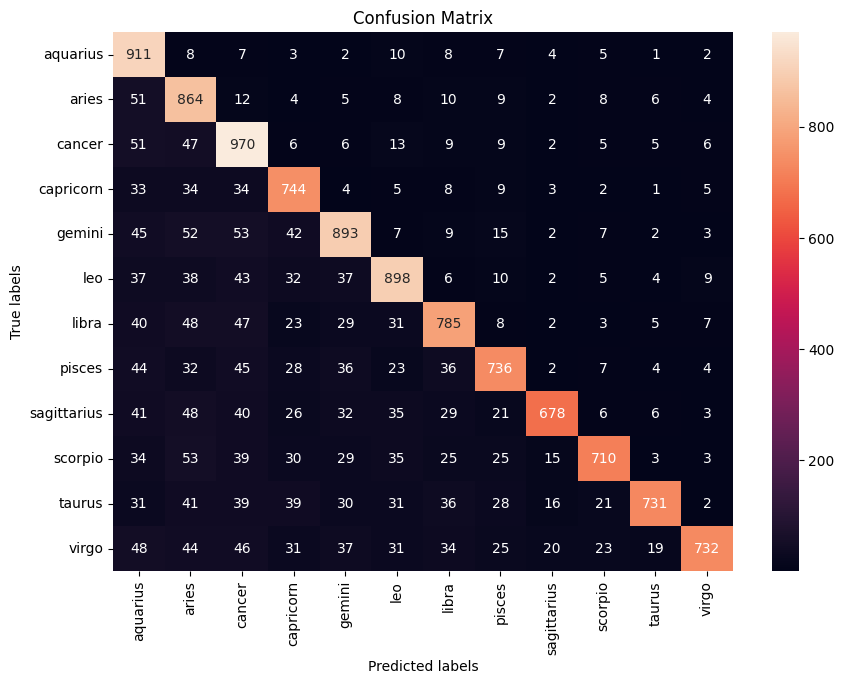

In [52]:
plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(cart_cm, annot=True, ax = ax,fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(cart_labels);
ax.yaxis.set_ticklabels(cart_labels);

The max depth of decision tree is 49. This is creating massive overfitting. We change the max depth to 5 and the accuarcy plummets to 9%.

In [53]:
cart_model.get_depth()

49

In [54]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=0)
results = cross_val_score(cart_model, X_train, Y_train, cv=kfold, scoring='accuracy')

print(results)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.08711507 0.0952188  0.08833063 0.1012966  0.08836644]
Baseline: 9.21% (0.54%)


We change the max depth to 20 and try again. Our new accuracy is 41%.

In [55]:
cart_model20 = DecisionTreeClassifier(max_depth = 20).fit(X_train, Y_train)
cart_predictions20 = cart_model20.predict(X_train)

In [56]:
print(classification_report(Y_train, cart_predictions20))

              precision    recall  f1-score   support

    aquarius       0.57      0.39      0.46       968
       aries       0.43      0.43      0.43       983
      cancer       0.37      0.50      0.42      1129
   capricorn       0.53      0.42      0.47       882
      gemini       0.40      0.44      0.42      1130
         leo       0.36      0.48      0.41      1121
       libra       0.29      0.42      0.34      1028
      pisces       0.61      0.34      0.44       997
 sagittarius       0.65      0.33      0.44       965
     scorpio       0.37      0.40      0.38      1001
      taurus       0.53      0.38      0.44      1045
       virgo       0.32      0.40      0.36      1090

    accuracy                           0.41     12339
   macro avg       0.45      0.41      0.42     12339
weighted avg       0.45      0.41      0.42     12339



Cross validations shows a 8% accuracy.

In [57]:
results20 = cross_val_score(cart_model20, X_train, Y_train, cv=kfold, scoring='accuracy')

print(results20)
print("Baseline: %.2f%% (%.2f%%)" % (results20.mean()*100, results.std()*100))

[0.07698541 0.08549433 0.0863047  0.08225284 0.09039319]
Baseline: 8.43% (0.54%)


Final attempt. This time we use KNN from earlier and we come out with 9% accuracy.

In [58]:
knn_predictionsVal = knn_model.predict(X_val)
print(classification_report(Y_val, knn_predictionsVal))

              precision    recall  f1-score   support

    aquarius       0.08      0.24      0.12       294
       aries       0.10      0.17      0.12       345
      cancer       0.09      0.15      0.11       328
   capricorn       0.07      0.07      0.07       315
      gemini       0.08      0.07      0.08       366
         leo       0.10      0.07      0.08       395
       libra       0.08      0.06      0.07       326
      pisces       0.08      0.05      0.06       337
 sagittarius       0.11      0.05      0.07       347
     scorpio       0.10      0.06      0.07       355
      taurus       0.09      0.05      0.06       345
       virgo       0.10      0.05      0.06       361

    accuracy                           0.09      4114
   macro avg       0.09      0.09      0.08      4114
weighted avg       0.09      0.09      0.08      4114



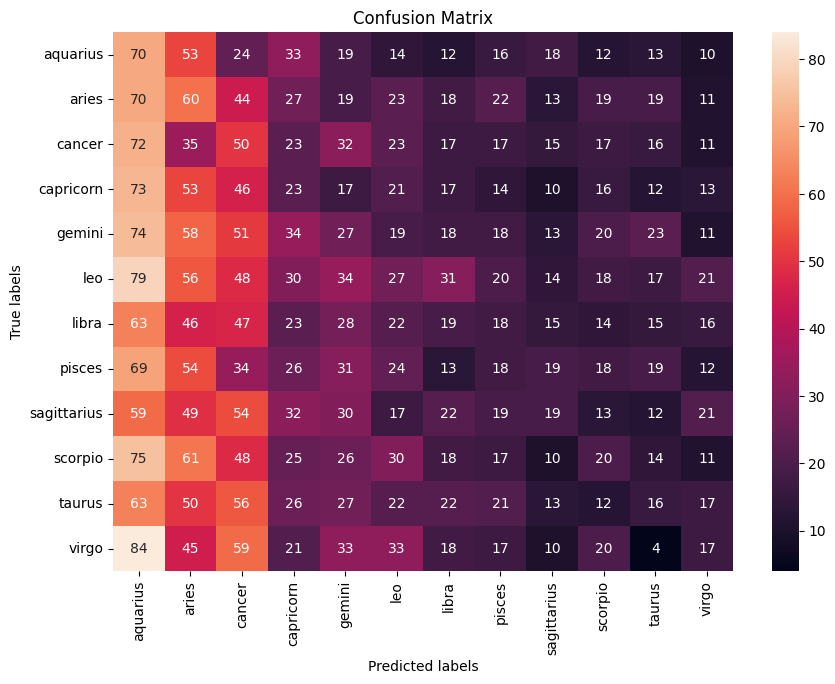

In [59]:
final_cm = confusion_matrix(Y_val, knn_predictionsVal)
knn_labels = knn_model.classes_

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(final_cm, annot=True, ax = ax, fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(knn_labels);
ax.yaxis.set_ticklabels(knn_labels);

Final Conclusion: Unfortunately none of our machine models could predict the astological signs. Thereby astrological signs have little to no influence on perceived body type, diet, orientation, pet preferences, religious affliation, sex, or profession.

